<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/16-Boosted-Trees/GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Boosting and GridSearch

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Prep

In [3]:
X = df.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['class']

X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [4]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

## Train | Test Split, Gradient Boosting and GridSearch with CV, Fitting

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)

param_grid = {'n_estimators':[1,5,30,50,100,150], 'max_depth':[2,3,5,7]}

gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model, param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

## Performance

In [6]:
preds = grid.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       630
           p       1.00      1.00      1.00       589

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [7]:
grid.best_estimator_.feature_importances_

array([1.39491516e-04, 8.39877848e-17, 4.07796757e-18, 0.00000000e+00,
       1.52898808e-17, 1.85581452e-03, 1.78827366e-05, 5.51167244e-06,
       9.08686746e-06, 0.00000000e+00, 2.65172262e-17, 0.00000000e+00,
       1.69866390e-16, 0.00000000e+00, 0.00000000e+00, 1.00920425e-04,
       2.17985533e-03, 5.93755638e-02, 2.43211270e-04, 2.47344532e-02,
       2.17346445e-02, 2.00377132e-04, 6.08388181e-01, 1.29723774e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.88458337e-03,
       9.19017778e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.75916015e-18,
       0.00000000e+00, 0.00000000e+00, 1.27726928e-17, 0.00000000e+00,
       7.24111020e-04, 3.03999582e-04, 1.26402511e-01, 8.48146792e-03,
       1.29739434e-02, 1.32801939e-03, 1.61877057e-06, 5.50777121e-06,
       5.63331518e-06, 1.02113075e-06, 5.39670379e-02, 2.60190437e-03,
       0.00000000e+00, 0.00000000e+00, 1.07171615e-05, 0.00000000e+00,
      

In [8]:
feat_imp = grid.best_estimator_.feature_importances_
imp_feats = pd.DataFrame(feat_imp, index=X.columns, columns=['Importance'])
imp_feats

,Importance
cap-shape_c,1.394915e-04
cap-shape_f,8.398778e-17
cap-shape_k,4.077968e-18
cap-shape_s,0.000000e+00
cap-shape_x,1.528988e-17
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,4.170923e-17


In [11]:
imp_feats.sort_values('Importance', ascending=False)

,Importance
odor_n,0.608388
stalk-root_c,0.126403
bruises_t,0.059376
stalk-surface-below-ring_y,0.053967
spore-print-color_r,0.034389
...,...
veil-color_o,0.000000
gill-color_h,0.000000
veil-color_y,0.000000
gill-color_g,0.000000


In [12]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.06398,0.0,0.0,0.000004,0.000715,0.608388


In [13]:
imp_feats = imp_feats[imp_feats['Importance']>0.0005]
imp_feats.sort_values('Importance')

,Importance
population_v,0.000521
spore-print-color_h,0.000543
ring-number_t,0.000707
stalk-shape_t,0.000724
odor_p,0.001297
stalk-surface-above-ring_k,0.001328
population_c,0.001484
stalk-color-above-ring_w,0.001519
ring-type_p,0.001712
cap-surface_g,0.001856


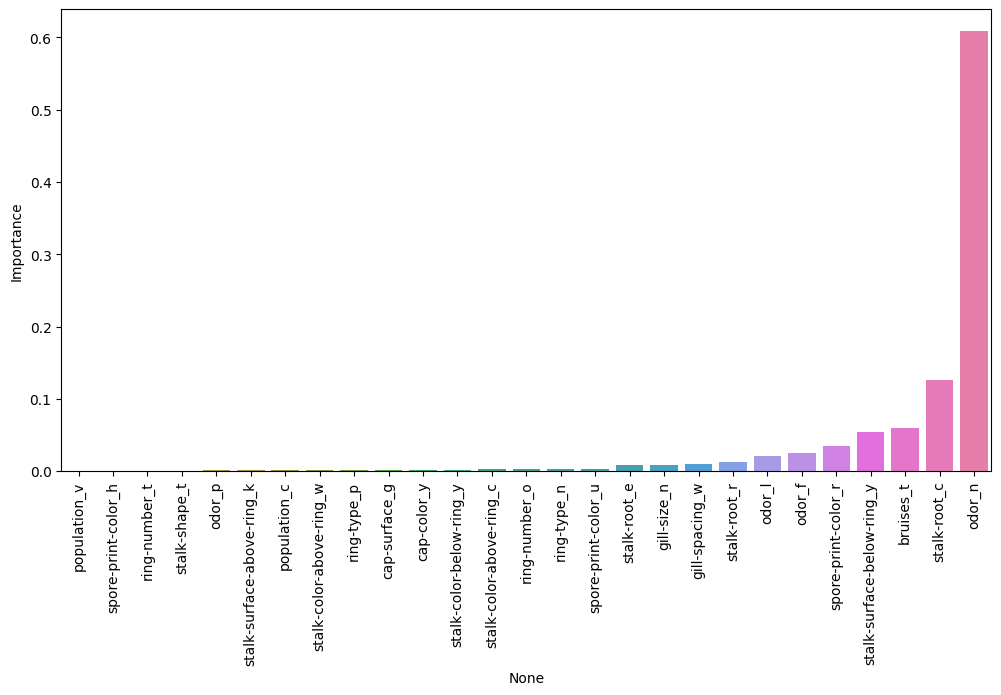

In [19]:
plt.figure(figsize=(12,6))

sns.barplot(imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance', hue=imp_feats.index, legend=False)
plt.xticks(rotation=90);